### Credit Risk Modeling
<img src="imgs/credit_risk.jpg" width="400" height="300">

The data set can be found here: https://www.kaggle.com/datasets/laotse/credit-risk-dataset.


About Dataset

Detailed data description of Credit Risk dataset:

| Feature Name | Description |
---------------|---------------
| person_age | Age|
person_income |	Annual Income
person_home_ownership |	Home ownership
person_emp_length |	Employment length (in years)
loan_intent |	Loan intent
loan_grade |	Loan grade
loan_amnt |	Loan amount
loan_int_rate |	Interest rate
loan_status |	Loan status (0 is non-default, 1 is default)
loan_percent_income |	Percent income
cb_person_default_on_file |	Historical default
cb_preson_cred_hist_length |	Credit history length

### Importing the necessary libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier

In [9]:
df = pd.read_csv('credit_risk_dataset.csv')   # reading in the data
df.head()   # viewing the first 5 rows of our data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Exploratory Data Analysis

In [11]:
df.shape

(32581, 12)

In [35]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [34]:
# Viewing the percentage of null values
np.round(df.isna().sum() * 100 / df.shape[0], 3)

person_age                    0.000
person_income                 0.000
person_home_ownership         0.000
person_emp_length             2.736
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 9.548
loan_status                   0.000
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
dtype: float64

It is observed that person_emp_length has 2.736% missing values and loan_int_rate has 9.548$ missing values.
- No categorical columns have missing values in our data set.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


It is observed that we have some outliers in our data set. Person age maximum is 144, and person employed length maximum is 123.

In [15]:
df.duplicated().sum()

165

### From above, it is noted that we have 165 duplicated records. We have to get rid of them.

In [18]:
dups = df.duplicated()
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [19]:
df[dups].shape

(165, 12)

### To confirm that these are indeed duplicated values, we can confirm with one of the people, let us now do so below.
We will use the df.query method. With this method, the expression passed to df.query is evaluated for each row in the DataFrame, and only the rows where the expression is True are included in the filtered DataFrame.

In [20]:
df.query("person_age==23 & person_income==42000 & \
person_home_ownership=='RENT' & loan_int_rate==9.99")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


### It is observed that no. 6464 and 15975 have the same set of values

### Dropping duplicates

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(32416, 12)

The number of rows is now less by 165, which was our duplicated rows.

 pd.get_dummies is used to convert categorical variables into one-hot encoded variables, which are also known as dummy variables. One-hot encoding is a technique to represent categorical variables in a numerical format, which is required by many machine learning algorithms.

In [135]:
df_dummies = pd.get_dummies(df)

# Again we make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns] 

df_dummies.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


In [136]:
df_dummies.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')

Checking which columns have null values and then imputting them with the mean

In [ ]:
null_columns = df_dummies.columns[df_dummies.isnull().any()]
print(null_columns)

In [ ]:
mean_value = df_dummies['person_emp_length'].mean()
df_dummies['person_emp_length'].fillna(mean_value, inplace=True)

mean_value = df_dummies['loan_int_rate'].mean()
df_dummies['loan_int_rate'].fillna(mean_value, inplace=True)

### Splitting our data set

In [177]:
X = df_dummies.drop('loan_status', axis=1)
y = df_dummies['loan_status']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                    stratify=y,
                                    shuffle=True,
                                    random_state=42)
# stratify ensures that the distribution is preserved in both training & testing y

In [144]:
df.loan_status.value_counts()

0    25327
1     7089
Name: loan_status, dtype: int64

In [145]:
df.loan_status.value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In [31]:
y.value_counts(normalize=True)

0    0.781312
1    0.218688
Name: loan_status, dtype: float64

In [29]:
y_test.value_counts(normalize=True)

0    0.781308
1    0.218692
Name: loan_status, dtype: float64

It is observed that we have 78.13% of the records as 0's, and 21.87% as 1's.
- We also see that both the y and y_test are preserved and are the same.

In [146]:
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1


The loan_percent_income column is just the loan_amount divided by person_income. It is not adding any new information. We can drop it

In [179]:
X.drop('loan_percent_income', axis=1, inplace=True)
X_test.drop('loan_percent_income', axis=1, inplace=True)

### Checking unique values in each column

In [148]:
for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

person_age ---> 58

person_income ---> 4295

person_emp_length ---> 36

loan_amnt ---> 753

loan_int_rate ---> 348

cb_person_cred_hist_length ---> 29

person_home_ownership_MORTGAGE ---> 2
0    58.758021
1    41.241979
Name: person_home_ownership_MORTGAGE, dtype: float64

person_home_ownership_OTHER ---> 2
0    99.673001
1     0.326999
Name: person_home_ownership_OTHER, dtype: float64

person_home_ownership_OWN ---> 2
0    92.093411
1     7.906589
Name: person_home_ownership_OWN, dtype: float64

person_home_ownership_RENT ---> 2
1    50.524432
0    49.475568
Name: person_home_ownership_RENT, dtype: float64

loan_intent_DEBTCONSOLIDATION ---> 2
0    83.992473
1    16.007527
Name: loan_intent_DEBTCONSOLIDATION, dtype: float64

loan_intent_EDUCATION ---> 2
0    80.22273
1    19.77727
Name: loan_intent_EDUCATION, dtype: float64

loan_intent_HOMEIMPROVEMENT ---> 2
0    88.912883
1    11.087117
Name: loan_intent_HOMEIMPROVEMENT, dtype: float64

loan_intent_MEDICAL ---> 2
0    81.361056
1   

- Person_age has 58 unique values
- person_income has 4295 unique values
- person_home_ownership has 4 unique values
- person_emp_length has 36 unique values
- loan_intent has 6 unique values
- loan_grade has 7 unique values
- loan_amnt has 753 unique values
- loan_int_rate has 348 unique values
- cb_person_default_on_file has 2 unique values



In [180]:
num_cols = [col for col in X if X[col].dtypes != 0]
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'loan_grade_A',
 'loan_grade_B',
 'loan_grade_C',
 'loan_grade_D',
 'loan_grade_E',
 'loan_grade_F',
 'loan_grade_G',
 'cb_person_default_on_file_N',
 'cb_person_default_on_file_Y']

Above are columns with numerical values

### Plotting graphs for our numerical columns

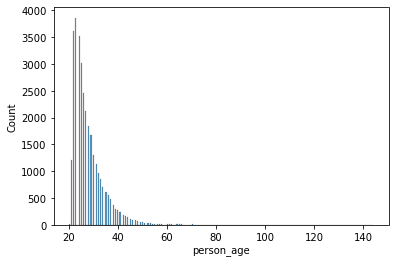

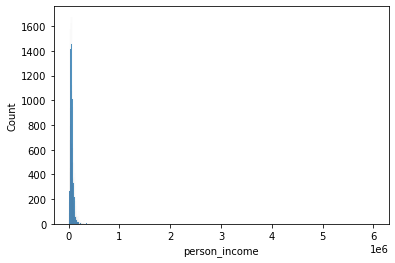

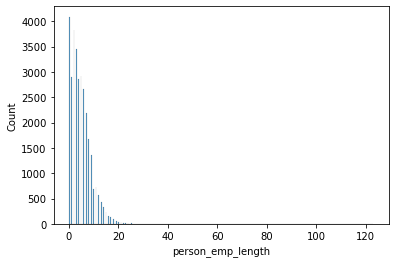

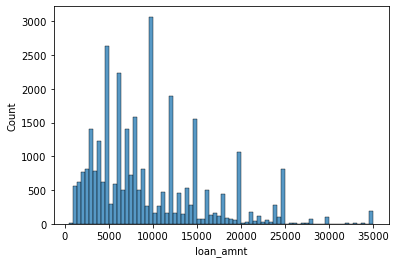

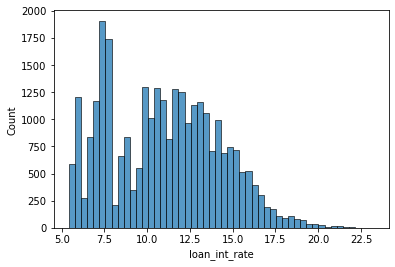

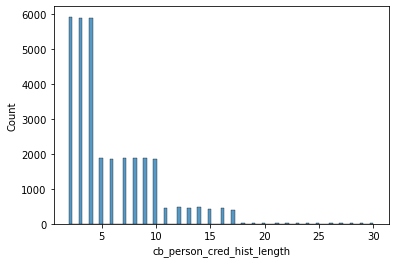

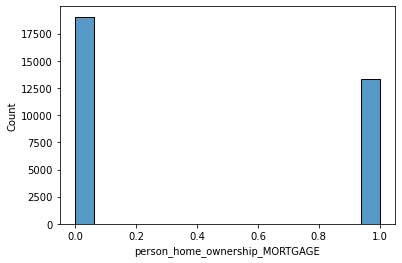

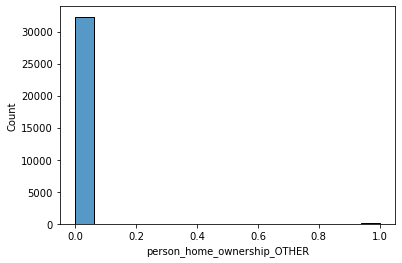

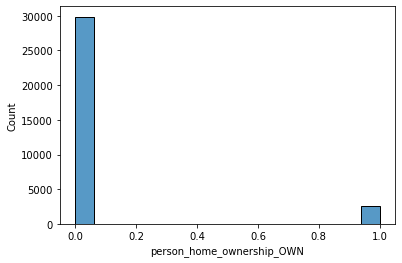

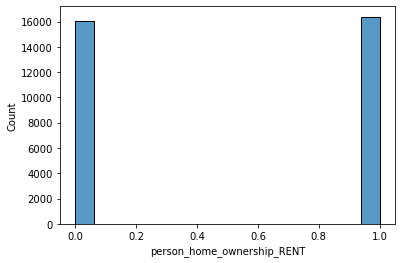

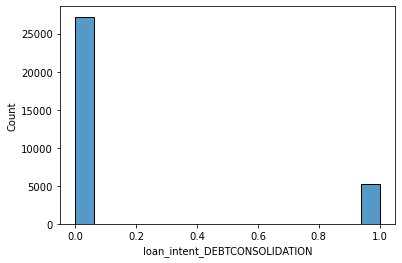

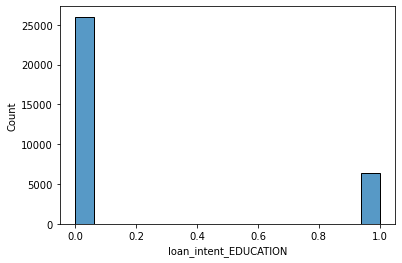

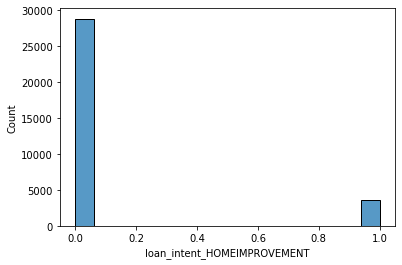

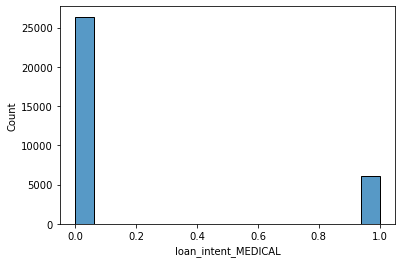

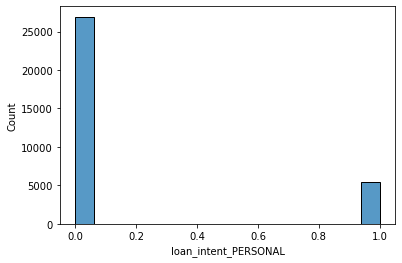

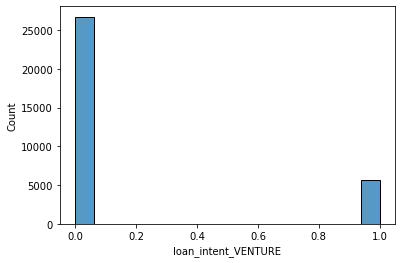

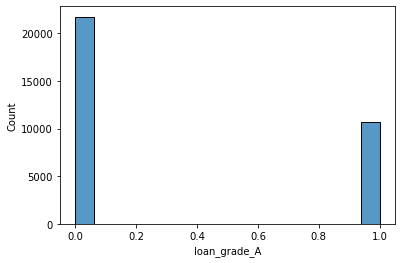

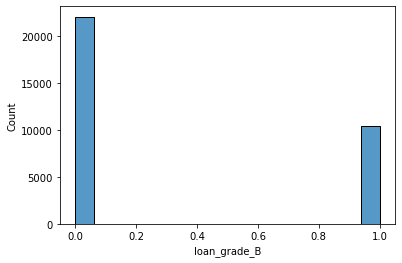

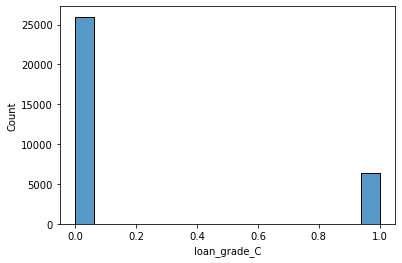

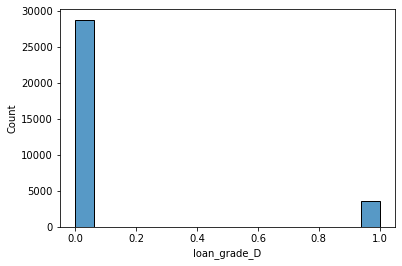

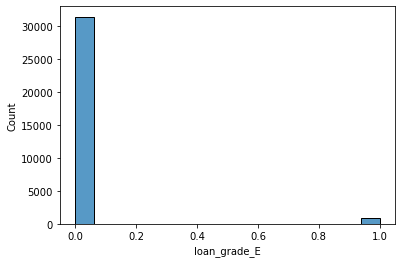

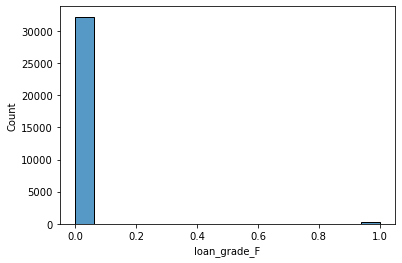

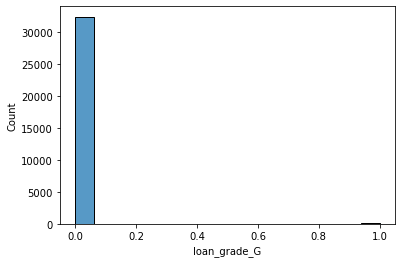

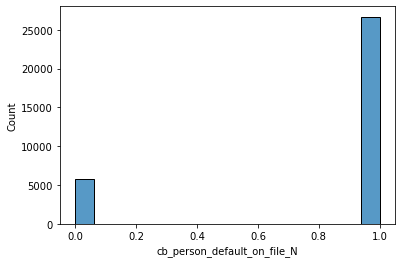

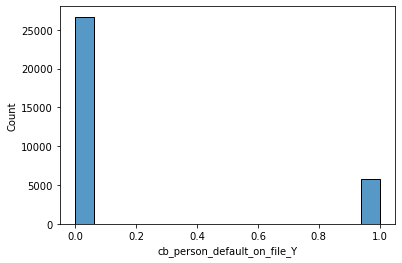

In [150]:
for col in num_cols:
    sns.histplot(X[col])
    plt.show()

### Removing people who are more than 80 years old.
We will assume that a person who is more than 80 will not usually apply for a loan, so we will remove them so that the model will be able to generalize better.

In [181]:
# Viewing peopl who are above 80 years old
X.loc[X['person_age']>=80, :]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
81,144,250000,4.0,4800,13.570000,3,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
183,144,200000,4.0,6000,11.860000,2,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
575,123,80004,2.0,20400,10.250000,3,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
747,123,78000,7.0,20000,11.017265,4,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
32297,144,6000000,12.0,5000,12.730000,25,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32416,94,24000,1.0,6500,11.017265,27,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
32422,80,64000,7.0,6800,11.710000,25,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
32506,84,94800,2.0,10000,7.510000,24,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [182]:
# keeping records of people who are less than 80
X = X.loc[X['person_age']<80, :]

In [183]:
X.shape

(32408, 25)

In [184]:
X.loc[X['person_emp_length']>=64, :]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,3,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
210,21,192000,123.0,20000,6.54,4,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


We will assume that the legal age a person is allowed to work is 16. So, we will remove any person who has more than 64 years of work experience.

In [185]:
# X = X.loc[X['person_emp_length']<64, :]
X = X.loc[(X['person_emp_length']<64) | (X['person_emp_length'].isna()), :]
                                      #  we don't want to drop missing values


### Deleting the corresponding y values

In [186]:
y = y[X.index]

In [187]:
categorical_cols = [col for col in X if X[col].dtypes == 'O']
categorical_cols

[]

For numerical columns, we have seen that we have 2 columns that have missing values, we are now dealing with them below by pasisng a pipeline into the column transformer.

In the pipeline, we will pass in 2 suceessive steps:
1. IterativeImputer - will impute the missing values
2. StandardScaler will scale the entire columns

For categorical columns, we don't have any missing values, we will just encode them using the OneHotEncoder.

In [188]:
numerical_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', StandardScaler()),
])

In [189]:
ct = ColumnTransformer([
    ('num_pipe', numerical_pipe, num_cols),
    ('categorical_cols', OneHotEncoder(sparse=False, handle_unknown='ignore'),
    categorical_cols)
], remainder='passthrough')

This code is creating a ColumnTransformer object in scikit-learn. The ColumnTransformer is a useful tool for preprocessing data in machine learning. It allows you to apply different preprocessing steps to different columns in your data, based on the type of data each column contains.

In this code, the ColumnTransformer is being created with two transformers: num_pipe and cat_cols. The num_pipe transformer is a pipeline that applies numerical preprocessing steps to the num_cols columns. The cat_cols transformer is an instance of the OneHotEncoder class, which is being used to one-hot encode the categorical columns in the data. The handle_unknown parameter is set to 'ignore', which means that any unknown categorical values that are encountered during the encoding process will be ignored.

Finally, the remainder parameter is set to 'passthrough', which means that any columns that are not specified in either the num_pipe or cat_cols transformers will be passed through to the final data without any changes.

Once the ColumnTransformer has been created, it can be used to preprocess the data by calling the fit_transform method. This method will apply the specified transformers to the data and return the preprocessed data, which can then be used for training or evaluating a machine learning model.

### The randomized search CV
RandomizedSearchCV is a method in the scikit-learn library in Python that implements randomized search with cross-validation. It's used to find the best hyperparameters of a machine learning model by sampling from a parameter space and evaluating the model's performance using cross-validation.

Grid is a dictionary. The keys of the grid dictionary are the classifiers themselves, in this case the RandomForestClassifier, and the LGBMClassifier.

In [190]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[50,100,200],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
    
    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[50,100,200],
     'model__learning_rate':[0.001,0.01,0.1,1],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

To extract informating from the dictionary above, we use the following code

In [191]:
# the .items will iterate over each element in the dictionary
for clf, param in grid.items():
    print(clf)    # clf is the random classifier, and the lgbm
    print('-'*50)
    print(param)
    print('\n')

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [50, 100, 200], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}


LGBMClassifier(class_weight='balanced', random_state=0)
--------------------------------------------------
{'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.001, 0.01, 0.1, 1], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}




In [192]:
full_df = pd.DataFrame()  # defining an empty dataframe
best_algos = {}    # defining an empty dictionary

for clf, param in grid.items():
    pipe = Pipeline([       # making a final pipeline
    ('coltf', ct),          # 1st step is the column transformer
    ('model', clf)          # 2nd step is the classifier
])

    randomized_search = RandomizedSearchCV(estimator=pipe, param_distributions=param,
                            scoring='accuracy', n_jobs=-1, verbose=3, n_iter=4,
                            random_state=0, error_score='raise')
    
    randomized_search.fit(X, y)    # fitting the model
    
    # this will hold all the info of the models that were built
    all_res = pd.DataFrame(randomized_search.cv_results_)  

    # taking params and mean_test_score from  all_res, saving it into temp dataframe
    temp = all_res.loc[:, ['params', 'mean_test_score']]

    # extracting the algorithm name, splitting on the ( and only taking the first part
    """
    e.g RandomForestClassifier(random_state=0, n_jobs=-1, ...

    will split at the (,
    and only take the name, i.e RandomForestClassifier
    """
    algo_name = str(clf).split('(')[0]   
    temp['algo'] = algo_name
    
    full_df = pd.concat([full_df, temp], ignore_index=True)
    best_algos[algo_name] = randomized_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


Sorting the full dataframe by the mean_test_score

In [193]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
1,"{'model__n_estimators': 200, 'coltf__num_pipe_...",0.907518,RandomForestClassifier
0,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.905975,RandomForestClassifier
2,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.905975,RandomForestClassifier
3,"{'model__n_estimators': 100, 'coltf__num_pipe_...",0.905975,RandomForestClassifier
4,"{'model__n_estimators': 50, 'model__learning_r...",0.856816,LGBMClassifier
5,"{'model__n_estimators': 100, 'model__learning_...",0.839907,LGBMClassifier
6,"{'model__n_estimators': 50, 'model__learning_r...",0.837224,LGBMClassifier
7,"{'model__n_estimators': 200, 'model__learning_...",0.832534,LGBMClassifier


To see what are the values of the best model

In [194]:
full_df.sort_values('mean_test_score', ascending=False).iloc[0, 0]

{'model__n_estimators': 200,
 'coltf__num_pipe__impute__estimator': LinearRegression()}

In [195]:
best_mod = best_algos['RandomForestClassifier']
best_mod

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'person_home_ownership_MORTGAGE',
                                                   'person_home_o...
                                                   'loan_intent_VENTURE',
                                                   'loan_grade_A',
                                                   'loan_grade_B',
                                                   'loan_grade_C',
                                                   'loan_grade_D',
                                                   'loan_grade_E',
                                                   'loan_grade_F',
                                                   'loan_grade_G',
                                                   'cb_person_default_on_file_N',
                                                   'cb_person_default_on_file_Y']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=0))])

Fitting on the entire data set

In [196]:
best_mod.fit(X, y)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'person_home_ownership_MORTGAGE',
                                                   'person_home_o...
                                                   'loan_intent_VENTURE',
                                                   'loan_grade_A',
                                                   'loan_grade_B',
                                                   'loan_grade_C',
                                                   'loan_grade_D',
                                                   'loan_grade_E',
                                                   'loan_grade_F',
                                                   'loan_grade_G',
                                                   'cb_person_default_on_file_N',
                                                   'cb_person_default_on_file_Y']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=0))])

In [197]:
preds = best_mod.predict(X_test)

In [198]:
confusion_matrix(y_test, preds)

array([[5066,    0],
       [   0, 1418]], dtype=int64)

In [ ]:
#plot_confusion_matrix(best_mod, X_test, y_test)

In [199]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5066
           1       1.00      1.00      1.00      1418

    accuracy                           1.00      6484
   macro avg       1.00      1.00      1.00      6484
weighted avg       1.00      1.00      1.00      6484



In [200]:
best_mod.score(X_test, y_test)

1.0

We have 100% accuracy

### We can plot the precision recall curve
The higher the value is closer to 1, the better our model.
- baseline is just a fraction of the positive values in the data, i.e the 1's

In [ ]:
plot_precision_recall_curve(estimator=best_mod, X=X_test, y=y_test, name='model AUC')
baseline = y_test.sum() / len(y_test)
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.legend(loc='best')

### The learning curve

In [201]:
a, b, c = learning_curve(best_mod, X, y, n_jobs=-1, scoring='accuracy')

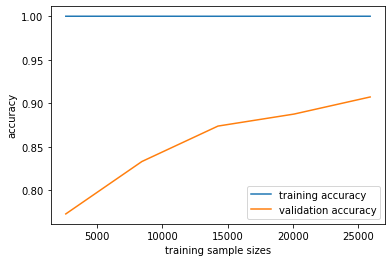

In [202]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

The learning curve suggest that the training accuracy is 100% on the training samples, while the testing/validation accuracy is 92%. Although it is a good accuracy, the gap is pretty high. This indicates overfitting on the training data set.

Overfitting is when we have:
- a higher training accuracy
- low testing/validation accuracy(model is not able to generalize well on testing data)
- big gap between the training and validation curves

### Remedial measures:

1. Add more training samples, if possible, to allow the model to learn better. This might not always be possible. Data might be at a premium and we only have the data that we have.

2. Working with data at hand:

We can try to make a simpler model / reduce the complexity of the model by:
- try reducing number of features
- try increasing regularization (lambda)
- try pruning the decision trees

In [203]:
grid = {
    
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[50,200,400],
     'model__max_depth':[5, 9, 13],
     'model__min_samples_split':[4,6,8],
     'coltf__num_pipe__impute__estimator': [LinearRegression(),
                                        RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

In [204]:
full_df = pd.DataFrame()
best_algos = {}

for clf, param in grid.items():
    pipe = Pipeline([
    ('coltf', ct),
    ('model', clf)
])

    gs = RandomizedSearchCV(estimator=pipe, param_distributions=param, scoring='accuracy',
                            n_jobs=-1, verbose=3, n_iter=4)
    
    gs.fit(X, y)
    
    all_res = pd.DataFrame(gs.cv_results_)

    temp = all_res.loc[:, ['params', 'mean_test_score']]
    algo_name = str(clf).split('(')[0]
    temp['algo'] = algo_name
    
    full_df = pd.concat([full_df, temp])
    best_algos[algo_name] = gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [205]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
1,"{'model__n_estimators': 200, 'model__min_sampl...",0.867836,RandomForestClassifier
0,"{'model__n_estimators': 200, 'model__min_sampl...",0.834880,RandomForestClassifier
3,"{'model__n_estimators': 50, 'model__min_sample...",0.832998,RandomForestClassifier
2,"{'model__n_estimators': 200, 'model__min_sampl...",0.798343,RandomForestClassifier


In [206]:
best2 = best_algos['RandomForestClassifier']
best2

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'person_home_ownership_MORTGAGE',
                                                   'person_home_o...
                                                   'loan_grade_C',
                                                   'loan_grade_D',
                                                   'loan_grade_E',
                                                   'loan_grade_F',
                                                   'loan_grade_G',
                                                   'cb_person_default_on_file_N',
                                                   'cb_person_default_on_file_Y']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=13,
                                        min_samples_split=8, n_estimators=200,
                                        n_jobs=-1, random_state=0))])

In [207]:
best2.fit(X, y)

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=LinearRegression())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length',
                                                   'person_home_ownership_MORTGAGE',
                                                   'person_home_o...
                                                   'loan_grade_C',
                                                   'loan_grade_D',
                                                   'loan_grade_E',
                                                   'loan_grade_F',
                                                   'loan_grade_G',
                                                   'cb_person_default_on_file_N',
                                                   'cb_person_default_on_file_Y']),
                                                 ('categorical_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=13,
                                        min_samples_split=8, n_estimators=200,
                                        n_jobs=-1, random_state=0))])

In [208]:
preds = best2.predict(X_test)

In [209]:
confusion_matrix(y_test, preds)

array([[4914,  152],
       [ 251, 1167]], dtype=int64)

In [210]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5066
           1       0.88      0.82      0.85      1418

    accuracy                           0.94      6484
   macro avg       0.92      0.90      0.91      6484
weighted avg       0.94      0.94      0.94      6484



In [212]:
best2.score(X_test, y_test)

0.9378470080197409

The best model gave 93.9% accuracy.

In [213]:
plot_precision_recall_curve(be, X_test, y_test)
baseline = y_test.sum() / len(y_test)
plt.axhline(baseline, ls='--', color='r', label=f'Baseline model ({round(baseline,2)})')
plt.legend(loc='best')

NameError: name 'plot_precision_recall_curve' is not defined

In [215]:
a, b, c = learning_curve(best2, X, y, n_jobs=-1, cv=5)

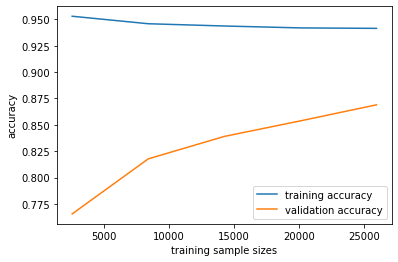

In [216]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

From above, we have a better model. The training accuracy is decreasing as we increase the training sample, which means the model is finding it harder to fit exactly to the training data, which is a good sign.
- The gap is also decreasing.

### Next steps?
- Export the model as a pickle file
- Deploy the model on a web application, so that it can make predictions on new data. 

### References
- [Credit Risk Image At Beginning Of Notebook](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.investopedia.com%2Fterms%2Fc%2Fcreditrisk.asp&psig=AOvVaw2Bi3SXXBptuYdSXDoHdCK2&ust=1675978545118000&source=images&cd=vfe&ved=0CBEQjhxqFwoTCOCy3ubwhv0CFQAAAAAdAAAAABAE)